# Tutorial about typical analysis routines

# Localization precision

In [1]:
from pathlib import Path

%matplotlib inline

import matplotlib.pyplot as plt

import locan as sp

In [2]:
sp.show_versions(system=False, dependencies=False, verbose=False)


Locan:
   version: 0.7.dev3+gb9aca40

Python:
   version: 3.8.8


## Load rapidSTORM data file

Identify some data in the test_data directory and provide a path using pathlib.Path

In [3]:
path = sp.ROOT_DIR / 'tests/Test_data/rapidSTORM_dstorm_data.txt'
print(path, '\n')

dat = sp.load_rapidSTORM_file(path=path, nrows=1000)

c:\users\soeren\mydata\programming\python\projects\locan\locan\tests\Test_data\rapidSTORM_dstorm_data.txt 



Print information about the data: 

In [4]:
print(dat.data.head(), '\n')
print('Summary:')
dat.print_summary()
print('Properties:')
print(dat.properties)

   position_x  position_y  frame  intensity  chi_square  local_background
0     9657.40     24533.5      0   33290.10   1192250.0           767.733
1    16754.90     18770.0      0   21275.40   2106810.0           875.461
2    14457.60     18582.6      0   20748.70    526031.0           703.370
3     6820.58     16662.8      0    8531.77   3179190.0           852.789
4    19183.20     22907.2      0   14139.60    448631.0           662.770 

Summary:
identifier: "1"
comment: ""
creation_date: "2021-03-04 13:45:21 +0100"
modification_date: ""
source: EXPERIMENT
state: RAW
element_count: 999
frame_count: 48
file_type: RAPIDSTORM
file_path: "c:\\users\\soeren\\mydata\\programming\\python\\projects\\locan\\locan\\tests\\Test_data\\rapidSTORM_dstorm_data.txt"

Properties:
{'localization_count': 999, 'position_x': 16066.234912912912, 'position_y': 17550.369092792796, 'region_measure_bb': 1064111469.8204715, 'localization_density_bb': 9.388114199807877e-07, 'subregion_measure_bb': 130483.2086

## Visualization

<AxesSubplot:title={'center':'counts'}, xlabel='position_x', ylabel='position_y'>

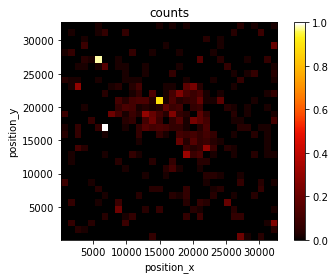

In [5]:
sp.render_2d(dat, bin_size=1000, rescale=(0,100));

## Analyze localization precision

Localization precision is determined from consecutive localizations that are identified within a certain search radius. The results include the distances between localization pairs, the position deltas for each coordinate and the corresponding frame of the first localizations.

In [6]:
lp = sp.LocalizationPrecision(radius=50)

In [7]:
lp.compute(dat)
lp.results.head()

Processed frames:: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:01<00:00, 33.80it/s]


,position_delta_x,position_delta_y,position_distance,frame
0,4.6,-2.8,5.385165,0
1,-1.0,-3.4,3.544009,0
2,17.0,-17.5,24.397746,0
3,5.1,-8.1,9.571834,0
4,-14.1,22.6,26.637755,0


The plot

<AxesSubplot:title={'center':'Localization Precision\n (window=10)'}, xlabel='frame', ylabel='position_delta_x'>

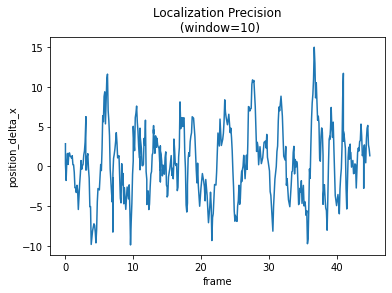

In [8]:
lp.plot(loc_property='position_delta_x', window=10);

<AxesSubplot:title={'center':'Localization Precision\n (window=10)'}, xlabel='frame'>

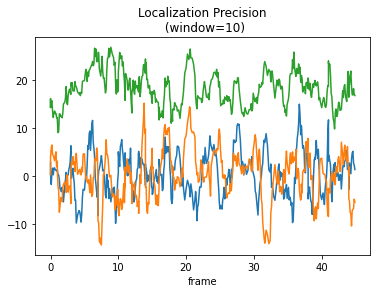

In [9]:
lp.plot(window=10);

The histogram for the distances per default includes a fit to a distribution expected for normal distributed localizations. Sigma / sqrt(2) is the localization precision.

C:\Miniconda3\envs\smlm_analysis\lib\site-packages\scipy\stats\_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


<AxesSubplot:title={'center':'Localization Precision'}, xlabel='position_distance', ylabel='PDF'>

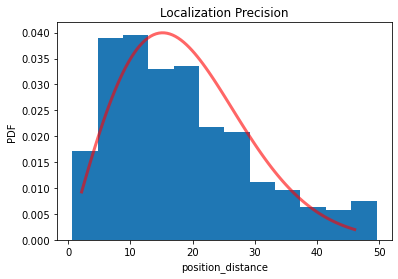

In [10]:
lp.hist();

Alternatively the position deltas can be histogrammed.

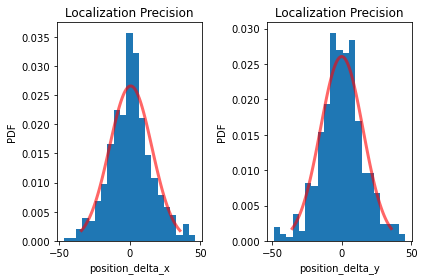

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2)
lp.hist(ax=ax[0], loc_property='position_delta_x')
lp.hist(ax=ax[1], loc_property='position_delta_y')
plt.tight_layout()
plt.show()

## Fit distributions and show parameters

Appropriate distribution functions are fitted to the data either by callen the hist function or by running:

In [12]:
lp.fit_distributions()

C:\Miniconda3\envs\smlm_analysis\lib\site-packages\scipy\stats\_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


The estimated fit parameters are provided under the `distribution_statistics` attribute

In [13]:
lp.distribution_statistics.parameter_dict()

{'position_delta_x_loc': 0.5793456521739601,
 'position_delta_x_scale': 15.01664582880988,
 'position_delta_y_loc': -0.028067391304342455,
 'position_delta_y_scale': 15.310244879968039,
 'position_distance_sigma': 15.169726562500031,
 'position_distance_loc': 0,
 'position_distance_scale': 1}

Remember: localization precision is typically defined as the standard deviation for the distances between localizations and their center position (the true dye position). Therefore, the estimated sigmas have to be divided by sqrt(2) to yield localization precision.